In [107]:
import numpy as np
import pandas as pd
import scipy.io

XYZ_Coord = scipy.io.loadmat('data\XYZcoord1.mat')
XYZ_C = np.array(XYZ_Coord ['XYZ1'])
XYZ_C

array([[ 0.6851533 ,  1.17897583,  3.52402492],
       [ 1.00216962,  1.21572705, 29.32701994],
       [ 1.15125728,  3.32476951, 23.614195  ],
       ...,
       [90.13576705, 15.58773776, 34.16825421],
       [90.73121678, 16.76765189, 13.4218382 ],
       [89.09981586, 18.50040944, 13.39066304]])

In [108]:
np.shape(XYZ_C)
XYZ_C[:,1]

array([ 1.17897583,  1.21572705,  3.32476951, ..., 15.58773776,
       16.76765189, 18.50040944])

In [114]:
#程式參考https://ithelp.ithome.com.tw/articles/10209058 修改

import matplotlib.pyplot as plt

# 群集中心和元素的數量
seed_num = 40
dot_num = len(XYZ_C)  #2000筆數據

# 初始元素
x = XYZ_C[:,0]
y = XYZ_C[:,1]
z = XYZ_C[:,2]

# 初始群集中心
kx = np.random.randint(-75, 75, seed_num)
ky = np.random.randint(-75, 75, seed_num)
kz = np.random.randint(0, 40, seed_num)


print(kx,ky,kz)

[-23  33   8 -42  29 -23 -44  21 -31   8  31 -50 -38  18 -55 -29  67  47
 -10 -47  46  33 -54  69  48 -72 -47 -70 -39 -38 -53   2 -62 -71  33 -16
  11 -24  -7 -62] [ 21 -41  -7  18 -11  56 -59  12 -71  46  -3  -7 -63  -4 -35   2 -57  29
  51  10   4  -4  35 -41 -45  -6  44 -23 -73 -57 -32  48  64 -72 -29  37
  18  20 -74 -38] [11 34 18 35  5 14 22 34 25 38 25  7 18 14 36 12 15 15 29  5 15 37  3 23
 24 22 39 34  0  6 21  0 27  0 25  5 21 16 17 13]


In [152]:
# 兩點之間的距離
def dis(x, y, z, kx, ky, kz):
    return int(((kx-x)**2 + (ky-y)**2 + (kz-z)**2)**0.5)

# 對每筆元素進行分群
def cluster(x, y, z, kx, ky, kz):
    team = []
    for i in range(4):
        team.append([])
    mid_dis = 99999999
    for i in range(dot_num):
        for j in range(seed_num):
            distant = dis(x[i], y[i], z[i], kx[j], ky[j], kz[j])
            if distant < mid_dis:
                mid_dis = distant
                flag = j
        team[flag].append([x[i], y[i], z[i]])
        mid_dis = 99999999
    return team


In [156]:
from sklearn import cluster

# KMeans 演算法
kmeans_fit = cluster.KMeans(n_clusters = 10).fit(XYZ_C)

# 印出分群結果
cluster_labels = kmeans_fit.labels_
print("分群結果：")
print(cluster_labels)
print("---")



分群結果：
[5 5 5 ... 9 9 9]
---


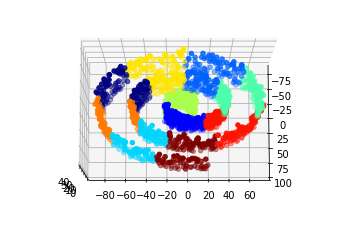

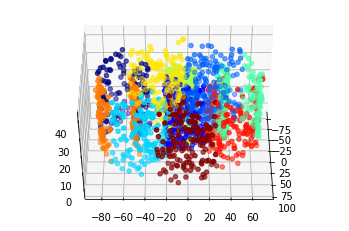

In [166]:
from mpl_toolkits.mplot3d import Axes3D
fig1 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = cluster_labels
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(80, 0)

fig2 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = cluster_labels
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(45, 0)